In [1]:
from src.fetch_stock_data import fetch_stock_data
from src.stock_trading_env import StockTradingEnv
import numpy as np


In [30]:
# Fetch stock data
tickers = ['GOOG', 'MSFT', 'TSLA']
stock_data = fetch_stock_data(tickers)

[*********************100%%**********************]  3 of 3 completed


In [31]:
# Initialize environment
env = StockTradingEnv(stock_data)

In [32]:
# Reset environment and take a sample step
initial_state = env.reset()
action = np.array([.6, 0.1, 0.2, 0.0])  
next_state, reward, done, _ = env.step(action)

In [33]:
initial_state

array([ 1.00000000e+04,  1.00000000e+04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  9.35178577e+01,  2.33856815e+02,  1.89205000e+02,
        5.30960888e+00,  1.03879579e+01,  1.31415016e+01,  1.02600021e+01,
        2.53753967e+01, -4.50699921e+01,  6.82173260e+01,  7.20170565e+01,
        2.59009838e+01])

In [34]:
action

array([0.6, 0.1, 0.2, 0. ])

In [35]:
next_state

array([ 7.76999383e+03,  6.65999260e+03,  3.74418551e+00,  3.00933086e+00,
        0.00000000e+00,  9.46128578e+01,  2.36264110e+02,  1.86911428e+02,
        4.61822216e+00,  8.76077601e+00,  1.08345260e+01,  1.53300018e+01,
        3.37021332e+01, -3.21100006e+01,  7.94016063e+01,  8.09959558e+01,
        3.49206370e+01])

In [36]:
reward

-0.6172825788774572

In [37]:
done

False

In [38]:
stock_data.iloc[0:4]

,GOOG,MSFT,TSLA
Date,,,
2022-11-02,87.070000,217.994003,214.979996
2022-11-03,83.489998,212.199982,215.309998
2022-11-04,86.699997,219.271652,207.470001
2022-11-07,88.650002,225.689667,197.080002


In [12]:
env = StockTradingEnv(stock_data.iloc[0:100])  # x test steps


In [13]:
env.action_space.sample()

array([ 3, 88,  7, 41])

In [14]:
env.step(env.action_space.sample())

(array([ 1.27872000e+04,  4.39560000e+03,  2.26448088e+00,  1.16027632e+01,
         2.90102625e+01,  9.46128578e+01,  2.36264105e+02,  1.86911428e+02,
         4.61822216e+00,  8.76077925e+00,  1.08345260e+01,  1.53300018e+01,
         3.37021179e+01, -3.21100006e+01,  7.94016063e+01,  8.09959331e+01,
         3.49206370e+01]),
 -11.642,
 False,
 {})

In [31]:
# env = StockTradingEnv(stock_data.iloc[0:40], seed=42, logging=True)  # x test steps
# initial_state = env.reset()
# print(f'Initial State: {initial_state}')

# done = False
# while not done:
#     # sample random action
#     random_action = env.action_space.sample()
#     random_action /= np.sum(random_action)  # Normalize to sum to 1
    
#     # take step
#     state, reward, done, _ = env.step(random_action)

#     print(f"\nAction: {random_action}, \nState: {state}, \nReward: {reward}")

# Function Aproximation

In [15]:
tickers = ['GOOG', 'SPY', 'AAPL', 'MSFT', 'BAX']
stock_data = fetch_stock_data(tickers, period='15y')

[*********************100%%**********************]  5 of 5 completed


In [16]:
stock_data

,AAPL,BAX,GOOG,MSFT,SPY
Date,,,,,
2008-11-03,3.242403,24.995380,8.629903,16.684641,72.676353
2008-11-04,3.364569,25.130180,9.139244,17.355869,75.146034
2008-11-05,3.131454,24.611399,8.524050,16.286339,71.987846
2008-11-06,3.004134,23.716814,8.249579,15.401208,67.998909
2008-11-07,2.978063,24.243767,8.247586,15.858526,70.244087
...,...,...,...,...,...
2023-10-26,166.889999,32.450001,123.440002,327.890015,412.549988
2023-10-27,168.220001,32.160000,123.400002,329.809998,410.679993
2023-10-30,170.289993,32.040001,125.750000,337.309998,415.589996


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque

# Q-Network
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return torch.softmax(self.fc3(x), dim=1)  # Use softmax to ensure the output sums to 1
    

# hyperparameters
state_size = env.get_state_size() #2*len(stock_data.columns) + 2  
action_size = len(stock_data.columns) + 1  
replay_buffer = deque(maxlen=5000)  # Increased replay buffer
batch_size = 32  # Reduced batch size for more frequent updates
gamma = 0.70  # Reduced gamma
epsilon = 1.0  # Increased initial epsilon for more exploration
epsilon_min = 0.01  # Reduced minimum epsilon
epsilon_decay = 0.995  # Slower decay
learning_rate = 0.005  # Increased initial learning rate

step_list = []
reward_list = []
portfolio_value_list = []
num_episodes = 10

# Q-Network and optimizer
q_network = QNetwork(state_size, action_size)
optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# environment
data_len = 1000
env = StockTradingEnv(stock_data.head(data_len), logging=False)

# Initialize array to hold portfolio values for all episodes
all_episodes_portfolio_values = np.zeros((num_episodes, data_len))

# training loop
for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_step = 0
    
    while not done and episode_step < data_len:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        
        if np.random.rand() <= epsilon:
            # action = np.random.rand(action_size)
            # action /= np.sum(action)
            action = env.action_space.sample()
        else:
            with torch.no_grad():
                action = q_network(state_tensor).numpy()[0]
        
        next_state, reward, done, _ = env.step(action)
        
        # portfolio value for the current episode and step
        all_episodes_portfolio_values[episode, episode_step] = next_state[0]
        
        step_list.append(episode) 
        reward_list.append(reward) # 
        portfolio_value_list.append(next_state[0])

        # experience for replay
        replay_buffer.append((state, action, reward, next_state, done))

        # Experience replay
        if len(replay_buffer) >= batch_size:
            minibatch = random.sample(replay_buffer, batch_size)
            states, actions, rewards, next_states, dones = zip(*minibatch)
            states = torch.FloatTensor(states)
            actions = torch.FloatTensor(actions)
            rewards = torch.FloatTensor(rewards)
            next_states = torch.FloatTensor(next_states)
            dones = torch.FloatTensor(dones)

            # Q-Learning
            q_values = q_network(states)
            with torch.no_grad():
                next_q_values = q_network(next_states)
            targets = rewards + (1 - dones) * gamma * torch.max(next_q_values, dim=1)[0]
            predicted_targets = torch.sum(actions * q_values, dim=1)
            
            loss = criterion(predicted_targets, targets)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        state = next_state
        episode_step += 1

    # epsilon decay
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

avg_portfolio_value = np.mean(all_episodes_portfolio_values, axis=0)


2023-11-02 09:44:20.072818: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 09:44:20.326608: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-02 09:44:20.366695: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/thorirhrafn/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-11-02 0

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x27 and 17x64)

In [115]:
replay_buffer

deque([(array([9.20181628e+03, 7.36145303e+03, 3.98215947e+01, 2.13079520e+01,
               0.00000000e+00, 3.52140022e+00, 5.00793314e+00, 1.55272373e+01,
               2.51233328e+01, 1.51929635e+01, 2.48876716e+01, 1.09352139e+02,
               4.60011880e-01, 2.54034700e-01, 1.11091309e-01, 4.82332411e-01,
               7.92000472e-01, 1.99345779e+00, 4.66003418e-01, 2.09216118e-01,
               1.02660561e+00, 1.47059631e+00, 8.53018069e+01, 6.73205348e+01,
               5.78096332e+01, 6.87376718e+01, 6.23815189e+01]),
        array([45, 39, 95, 53, 41, 67], dtype=int64),
        -2.3016203711180743,
        array([9.20290746e+03, 6.16594800e+03, 3.03297960e+01, 1.69275904e+01,
               6.81734327e+01, 2.27756508e+01, 4.12089852e+00, 1.56383168e+01,
               2.51704351e+01, 1.52124263e+01, 2.49862379e+01, 1.09488173e+02,
               4.96242938e-01, 2.82983243e-01, 1.38465011e-01, 5.36521250e-01,
               8.46951179e-01, 1.55511284e+00, 6.59431458e-01,

In [112]:
action

array([0.10308303, 0.27047402, 0.13648959, 0.31114182, 0.11136787,
       0.06744366])

In [96]:
next_state

array([1.14523783e+04, 6.64237943e+03, 6.63271256e+01, 5.71352770e+01,
       4.88899814e+01, 8.73450603e+00, 6.49150116e+00, 2.08565320e+01,
       2.70934311e+01, 1.78287450e+01, 2.51810008e+01, 1.18129008e+02,
       4.49997959e-01, 3.39347862e-01, 4.78550877e-01, 2.34316039e-01,
       1.11195006e+00, 1.00763321e-01, 1.23362732e+00, 1.70461082e+00,
       0.00000000e+00, 3.21217346e+00, 5.16080977e+01, 8.14642205e+01,
       8.44196008e+01, 5.00000000e+01, 6.88161990e+01])

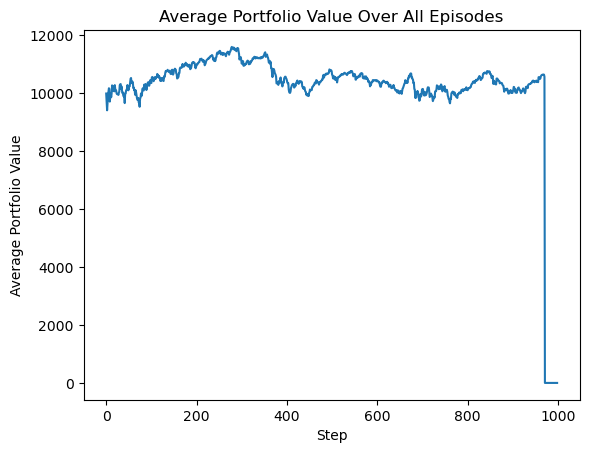

In [117]:
avg_portfolio_value = np.mean(all_episodes_portfolio_values, axis=0)
import matplotlib.pyplot as plt

plt.plot(avg_portfolio_value[:-1])
plt.xlabel('Step')
plt.ylabel('Average Portfolio Value')
plt.title('Average Portfolio Value Over All Episodes')
plt.show()

In [18]:
env = StockTradingEnv(stock_data.tail(1000), logging=True)

# testing loop
total_test_episodes = 1
test_rewards = []
test_portfolio_values = []

for episode in range(total_test_episodes):
    state = env.reset()
    done = False
    episode_rewards = 0
    episode_portfolio_values = []

    while not done:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)

        # trained Q-network to select an action
        with torch.no_grad():
            action = q_network(state_tensor).numpy()[0]

        next_state, reward, done, _ = env.step(action)

        episode_rewards += reward
        episode_portfolio_values.append(next_state[0])  

        state = next_state

    test_rewards.append(episode_rewards)
    test_portfolio_values.append(episode_portfolio_values)

print("Average test reward:", np.mean(test_rewards))


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x27 and 17x64)

In [110]:
q_network(state_tensor).detach().numpy()[0]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [105]:
action

array([1., 0., 0., 0., 0., 0.], dtype=float32)

# PPO

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical

class PolicyNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(PolicyNetwork, self).__init__()
        
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, action_size)
        
        # Xavier initialization
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x


class PPOAgent:
    def __init__(self, state_size, action_size, lr, gamma, clip_epsilon):
        self.state_size = state_size
        self.action_size = action_size
        self.lr = lr
        self.gamma = gamma
        self.clip_epsilon = clip_epsilon
        
        self.policy = PolicyNetwork(state_size, action_size)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=self.lr)

    def get_action(self, state):
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            probs = self.policy(state_tensor)
        return probs.numpy()

    def train(self, states, actions, rewards, next_states, dones):
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)
        
        # Compute discounted rewards
        discounted_rewards = []
        R = 0
        for reward, done in zip(reversed(rewards), reversed(dones)):
            R = reward + self.gamma * R * (1. - done)  # fixed off by one bug
            discounted_rewards.insert(0, R)
        discounted_rewards = torch.FloatTensor(discounted_rewards)
        
        # Forward pass
        probs = self.policy(states)
        m = Categorical(probs)
        
        # Compute log probability of chosen action
        old_log_probs = m.log_prob(actions)
        
        # Compute advantage estimates
        advantage = discounted_rewards  # This is a simplification. Normally you'd subtract a baseline.

        # Compute the PPO loss
        new_probs = self.policy(states)
        m_new = Categorical(new_probs)
        new_log_probs = m_new.log_prob(actions)
        
        ratio = torch.exp(new_log_probs - old_log_probs)
        surrogate1 = ratio * advantage
        surrogate2 = torch.clamp(ratio, 1.0 - self.clip_epsilon, 1.0 + self.clip_epsilon) * advantage
        
        loss = -torch.min(surrogate1, surrogate2).mean()

        # Zero gradients
        self.optimizer.zero_grad()
        
        # Compute gradients
        loss.backward()
        
        # Clip gradients
        for param in self.policy.parameters():
            if param.grad is not None:
                param.grad.data.clamp_(-1, 1)
        
        # Perform optimization step
        self.optimizer.step()

In [21]:
state

array([ 1.00000000e+04,  1.00000000e+04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.44989976e+01,
        7.64261796e+01,  6.53700714e+01,  1.44704575e+02,  2.92508822e+02,
        5.98116747e-01,  5.09213227e-01,  5.93270086e-01,  1.47611372e+00,
        1.82350901e+00, -6.12125397e-01,  8.51501465e-01, -1.76002502e-01,
        2.64451599e+00,  5.15991211e-01,  4.61656907e+01,  5.86665631e+01,
        4.85851874e+01,  6.43260410e+01,  5.17283961e+01])

In [22]:
ppo_agent.get_action(state) 

NameError: name 'ppo_agent' is not defined

In [135]:
np.random.choice(action_size, p=action_prob.ravel())


4

In [23]:
from src.stock_trading_env_2 import StockTradingEnv
env = StockTradingEnv(stock_data, logging=False)


In [24]:
# Initialize PPOAgent
ppo_agent = PPOAgent(state_size, action_size, lr=1e-2, gamma=0.90, clip_epsilon=0.2)

# Training Loop with PPO
for episode in range(num_episodes):
    state = env.reset()
    state = np.array(state) / 10000.0  # Normalize state here
    done = False
    episode_step = 0
    
    while not done and episode_step < data_len:
        action_prob = ppo_agent.get_action(state) 
        action = np.random.choice(action_size, p=action_prob.ravel())
        action_vector = np.zeros(action_size)
        action_vector[action] = 1

        next_state, reward, done, _ = env.step(action_vector)

        # Train PPO agent
        ppo_agent.train([state], [action_vector], [reward], [next_state], [done])
        
        state = next_state
        episode_step += 1


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x27 and 17x128)

In [122]:
state

array([ 1.45852677e+04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.37395438e+01,  1.73984287e+02,
        3.73521432e+01,  1.33872858e+02,  3.18554289e+02,  4.28607147e+02,
        2.53385152e+00,  5.56420011e-01,  2.96299018e+00,  5.23584456e+00,
        4.27761715e+00, -8.00018311e-02, -2.46999741e+00,  6.69998169e-01,
        1.17001343e+00, -1.04199829e+01,  4.98347074e+01,  1.74143229e+01,
        5.11908966e+01,  5.11235023e+01,  3.73050823e+01])

In [ ]:
# PPO 2

# PPO 2

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical
import numpy as np

class PolicyNetwork(nn.Module):
    def __init__(self, state_size, n_stocks):
        super(PolicyNetwork, self).__init__()
        self.n_stocks = n_stocks
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 256)
        
        # One output layer for each stock and one for cash, each having 101 possible actions
        # self.fc_cash = nn.Linear(256, 101)
        # self.fc_stocks = nn.ModuleList([nn.Linear(256, 101) for _ in range(n_stocks)])

        # One output layer for each stock and one for cash, each having 101 possible actions
        self.fc_cash = nn.Linear(256, 101)
        self.fc_stocks = nn.ModuleList([nn.Linear(256, 101) for _ in range(self.n_stocks)])  # self.n_stocks should be 5

        
        # Xavier initialization
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc_cash.weight)
        for fc_stock in self.fc_stocks:
            torch.nn.init.xavier_uniform_(fc_stock.weight)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # Concatenate cash and stock probabilities into a single vector
        cash_prob = F.softmax(self.fc_cash(x), dim=1)
        stock_probs = [F.softmax(fc_stock(x), dim=1) for fc_stock in self.fc_stocks]
        
        action_probs = torch.cat([cash_prob] + stock_probs, dim=1)
        
        return action_probs

# Define the PPO Agent
class PPOAgent:
    def __init__(self, state_size, action_size, lr, gamma, clip_epsilon, n_stocks):
        self.state_size = state_size
        # self.action_size = action_size
        self.n_stocks = n_stocks  # New line
        self.action_size = 101 * (n_stocks + 1)  # Correcting the action size
        self.lr = lr
        self.gamma = gamma
        self.clip_epsilon = clip_epsilon
        self.policy = PolicyNetwork(state_size, self.n_stocks)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=self.lr)

    # def get_action(self, state):
    #     state_tensor = torch.FloatTensor(state).unsqueeze(0)
    #     with torch.no_grad():
    #         action_probs = self.policy(state_tensor).numpy().ravel()

    #     # Ensure the size of action_probs matches expectations
    #     expected_size = 101 * (self.n_stocks + 1)  # +1 for cash
    #     assert len(action_probs) == expected_size, f"Size mismatch: {len(action_probs)} vs {expected_size}"
            
    #     # Split probabilities for cash and stocks and sample actions
    #     cash_prob, stock_probs = np.split(action_probs, [101])
    #     cash_action = np.random.choice(101, p=cash_prob)

    #     # Now, split stock_probs into 'self.n_stocks' equal parts of size 101
    #     stock_actions = [np.random.choice(101, p=stock_prob) for stock_prob in np.split(stock_probs, self.n_stocks)]

    #     # Combine them into one action array
    #     return np.array([cash_action] + stock_actions)

    def get_action(self, state):
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            action_probs = self.policy(state_tensor).numpy().ravel()
        
        # Normalize the action probabilities and return as the action
        action_probs_normalized = action_probs / np.sum(action_probs)
        return action_probs_normalized


    # def train(self, states, actions, rewards, next_states, dones):
    #     states = torch.FloatTensor(states)
    #     actions = torch.LongTensor(actions)
    #     rewards = torch.FloatTensor(rewards)
    #     next_states = torch.FloatTensor(next_states)
    #     dones = torch.FloatTensor(dones)
        
    #     # Compute and normalize discounted rewards
    #     discounted_rewards = self.compute_discounted_rewards(rewards, dones)
    #     discounted_rewards = (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-5)
        
    #     # Forward pass
    #     probs = self.policy(states)
    #     m = Categorical(probs)
    #     old_log_probs = m.log_prob(actions)
        
    #     # Compute advantage estimates
    #     advantage = discounted_rewards  # This is a simplification. Normally you'd subtract a baseline.

    #     # Compute PPO loss
    #     new_probs = self.policy(states)
    #     m_new = Categorical(new_probs)
    #     new_log_probs = m_new.log_prob(actions)
        
    #     ratio = torch.exp(new_log_probs - old_log_probs)
    #     surrogate1 = ratio * advantage
    #     surrogate2 = torch.clamp(ratio, 1.0 - self.clip_epsilon, 1.0 + self.clip_epsilon) * advantage
        
    #     loss = -torch.min(surrogate1, surrogate2).mean()

    #     # Zero gradients, perform backpropagation and optimization steps
    #     self.optimizer.zero_grad()
    #     loss.backward()
        
    #     # Clip gradients
    #     for param in self.policy.parameters():
    #         if param.grad is not None:
    #             param.grad.data.clamp_(-1, 1)
        
    #     self.optimizer.step()

    def train(self, states, actions, rewards, next_states, dones):
        states = torch.FloatTensor(states)
        actions = torch.FloatTensor(actions)  # actions are now vectors
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)
        
        # Compute and normalize discounted rewards
        discounted_rewards = self.compute_discounted_rewards(rewards, dones)
        
        # Forward pass to get the action probabilities
        probs = self.policy(states)
        
        # Calculate the loss between the predicted probabilities and the taken actions
        # This is a simplified way to directly compute the loss
        loss = -torch.sum(actions * torch.log(probs))
        
        # Zero gradients, backpropagation, optimization
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def compute_discounted_rewards(self, rewards, dones):
        discounted_rewards = []
        R = 0
        for reward, done in zip(reversed(rewards), reversed(dones)):
            R = reward + self.gamma * R * (1. - done)
            discounted_rewards.insert(0, R)
        return torch.FloatTensor(discounted_rewards)



In [28]:
# Initialize Environment and PPOAgent
# Assuming `env`, `state_size`, `action_size`, `num_episodes` and `data_len` are defined elsewhere
BATCH_SIZE = 64  # Define a suitable batch size
ppo_agent = PPOAgent(env.get_state_size(), 6, lr=1e-2, gamma=0.99, clip_epsilon=0.2, n_stocks=5)

batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = [], [], [], [], []

# Training Loop with PPO
for episode in range(num_episodes):
    state = env.reset()
    state = np.array(state) / 10000.0
    done = False
    episode_step = 0
    
    while not done and episode_step < data_len:
        action_prob_normalized = ppo_agent.get_action(state)
        action = action_prob_normalized  # The action is now a vector
        
        batch_actions.append(action)
        
        next_state, reward, done, _ = env.step(action)
        
        # Store experiences
        batch_states.append(state)
        batch_rewards.append(reward)
        batch_next_states.append(next_state)
        batch_dones.append(done)
        
        if len(batch_states) >= BATCH_SIZE:
            ppo_agent.train(batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones)
            batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = [], [], [], [], []
        
        state = next_state
        episode_step += 1

ValueError: Shape mismatch: new_stock_prices 5 vs stock_weights 605

In [29]:
action_prob = ppo_agent.get_action(state)
action_prob_normalized = action_prob / np.sum(action_prob)
print(f"Shape of action_prob_normalized: {action_prob_normalized.shape}")


Shape of action_prob_normalized: (606,)


In [ ]:
print(action_size)
print(action_prob)

6
[54  5 97 51 16 70]


In [ ]:
print("Action_probs shape:", action_probs.shape)
print("Number of stocks:", ppo_agent.n_stocks)
print("Length of stock_probs:", len(stock_probs))


Action_probs shape: (707,)
Number of stocks: 5
Length of stock_probs: 606


In [ ]:
action_size

6

In [ ]:
env.action_space

MultiDiscrete([101 101 101 101 101 101])

# A2C

In [25]:
from src.a2c_agent import A2CAgent

In [42]:
state_size = env.get_state_size() #2*len(stock_data.columns) + 2  
action_size = len(stock_data.columns) + 1  

print(f'state size: {state_size}')
print(f'action size: {action_size}')


policy = A2CAgent(state_size, action_size)

state size: 17
action size: 4


In [28]:
class Buffer:

    def __init__(self) -> None:
        self.rewards = []
        self.states = []
        self.actions = []
        self.dones = []

    def clear(self):
        self.rewards = []
        self.states = []
        self.actions = []
        self.dones = []

    def add(self, r, s, a, d):
        self.rewards.append(r)
        self.states.append(s)
        self.actions.append(a)
        self.dones.append(d)

    def unzip(self):
        return self.rewards, self.states, self.actions, self.dones

In [41]:
# initialize gamma and stats
gamma = 0.99
episodes = 1000
total_scores = []
avg_scores = []
buffer = Buffer()

for e in range(1, episodes + 1):
    buffer.clear()
    # reset environment
    state = env.reset()
    epoch_rewards = 0
    while True:
        print(f'\nstate: \n {state}')
        action = policy.action_sample(state)
        print(f'\naction: \n {action}')
        # use that action in the environment
        new_state, reward, done, _ = env.step(action)
        epoch_rewards += reward
        # store state, action, reward and done
        buffer.add(reward, state, action, done)

        state = new_state
        if done:
            total_scores.append(epoch_rewards)
            break

    advantage = policy.update(state, buffer)

    if e % 100 == 0:
        plt.plot(advantage)
        plt.axhline(y = 0, color = 'r', linestyle = '-')
        plt.title(f'Advantage Actor Critic. Advantage.\nEpisode: {e}')
        plt.ylabel('Advantage (G - V(s))')
        plt.xlabel('State Number (St)')
        plt.show()

# close environment
env.close()


state: 
 [ 1.00000000e+04  1.00000000e+04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.35178577e+01  2.33856815e+02  1.89205000e+02
  5.30960888e+00  1.03879579e+01  1.31415016e+01  1.02600021e+01
  2.53753967e+01 -4.50699921e+01  6.82173260e+01  7.20170565e+01
  2.59009838e+01]

action: 
 2


IndexError: invalid index to scalar variable.